# Group 3
## Navya SRi Vattikuti
## Sri Sai Sravya Ayagari
## Abhay Kumar Laddha

### All packages imported at once

In [71]:
%matplotlib inline
import os
import getopt
import sys
import tensorflow as tf
import numpy as np
from sklearn import datasets, linear_model
from scipy import stats
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import feature_column
from tensorflow.keras import layers
from __future__ import absolute_import, division, print_function, unicode_literals, print_function

In [5]:
tf.__version__

'2.11.0'

### Import Titanic data set using pandas

In [6]:
titanic = pd.read_csv("C:\\Users\\LabUser\\Documents\\NS\\titanic.csv")
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [7]:
titanic.head(10)
titanic.shape

(1310, 14)

### Basic stats of data set

In [8]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


### Plot of the survived(predictor) column

C:\Users\LabUser\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survived', ylabel='count'>

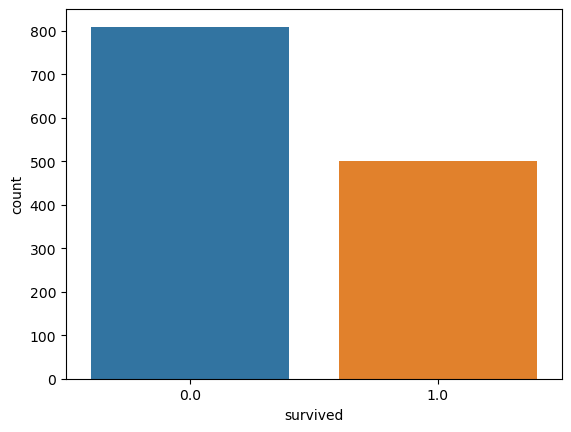

In [9]:
sns.countplot("survived", data = titanic)

### Analyzing "Sex" in titanic

C:\Users\LabUser\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


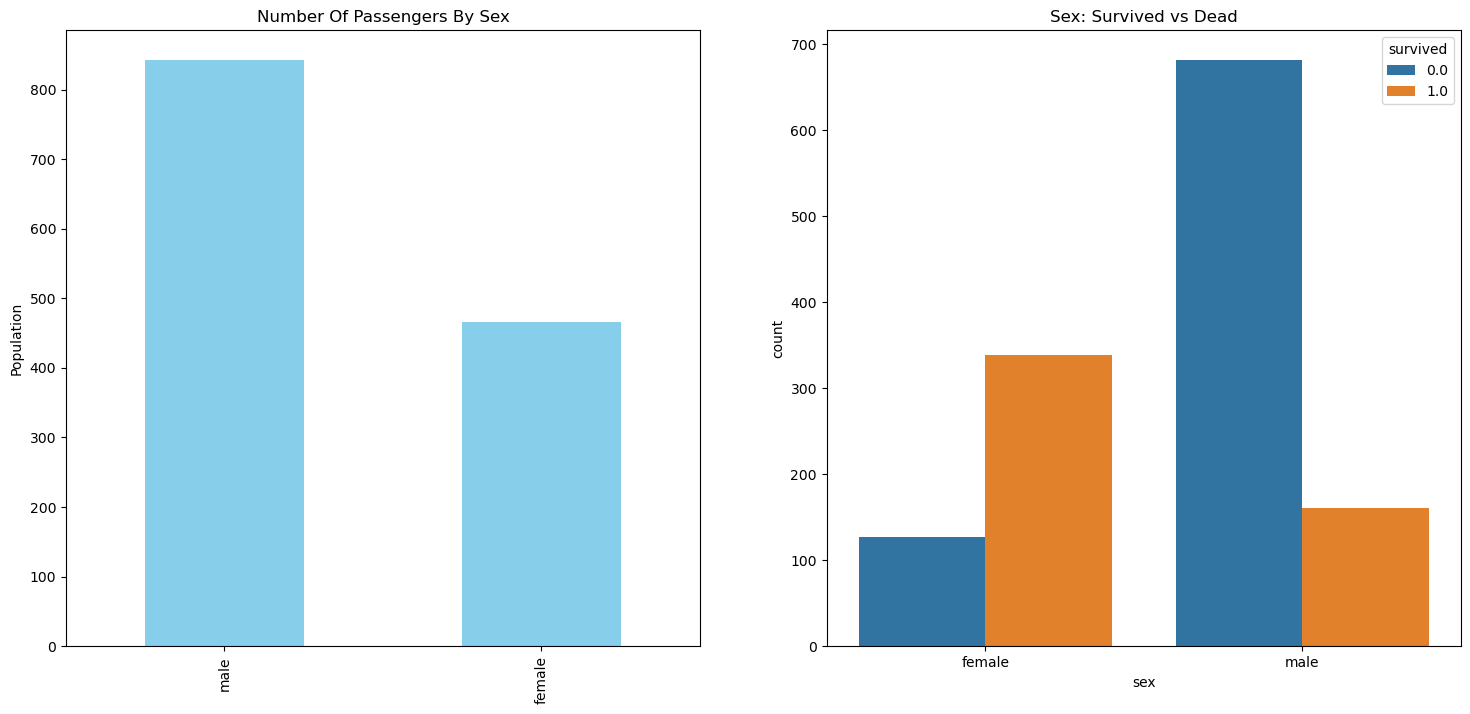

In [10]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
titanic["sex"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of Passengers By Sex")
ax[0].set_ylabel("Population")
sns.countplot("sex", hue = "survived", data = titanic, ax = ax[1])
ax[1].set_title("Sex: Survived vs Dead")
plt.show()

C:\Users\LabUser\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\LabUser\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


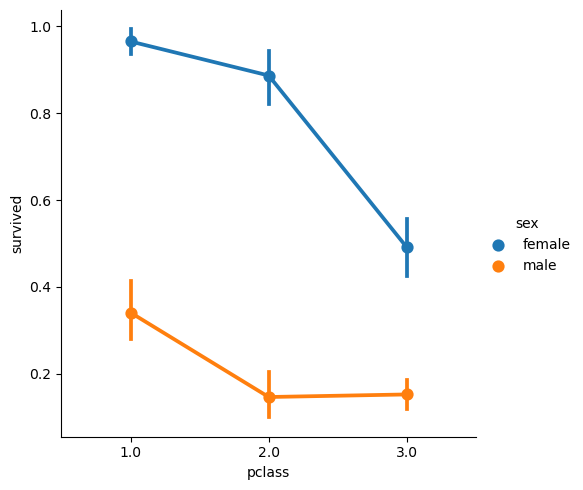

In [11]:
sns.factorplot("pclass", "survived", hue = "sex", data = titanic)
plt.show()

In [12]:
pd.crosstab([titanic["sex"], titanic["survived"]], titanic["pclass"], 
            margins = True).style.background_gradient(cmap = "summer_r")

### Analyzing pclass

C:\Users\LabUser\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


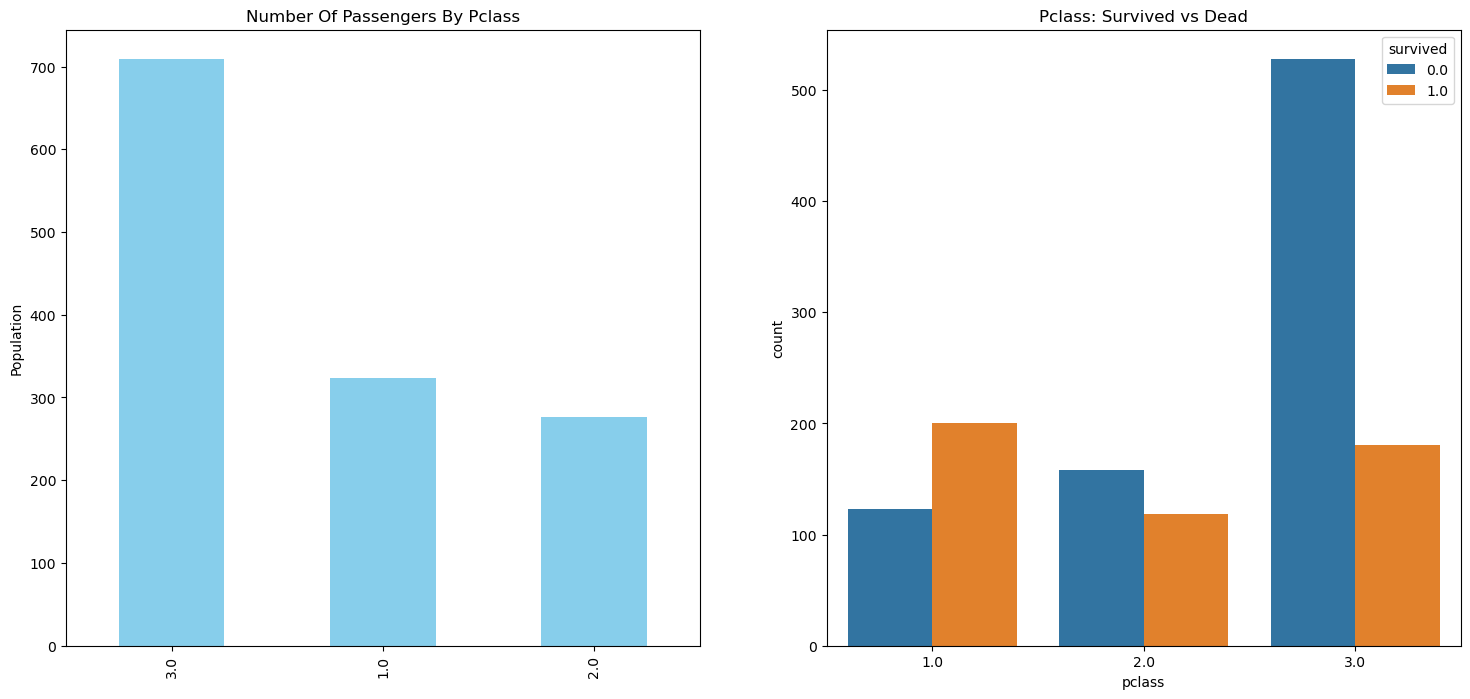

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
titanic["pclass"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of Passengers By Pclass")
ax[0].set_ylabel("Population")
sns.countplot("pclass", hue = "survived", data = titanic, ax = ax[1])
ax[1].set_title("Pclass: Survived vs Dead")
plt.show()

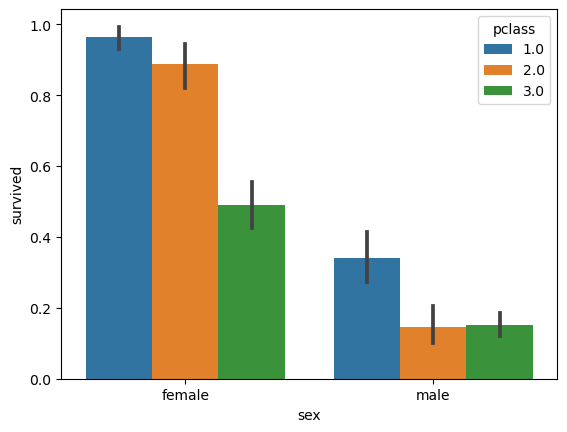

In [14]:
sns.barplot(x = "sex", y = "survived", hue = "pclass", data = titanic)
plt.show()

C:\Users\LabUser\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pclass', ylabel='age'>

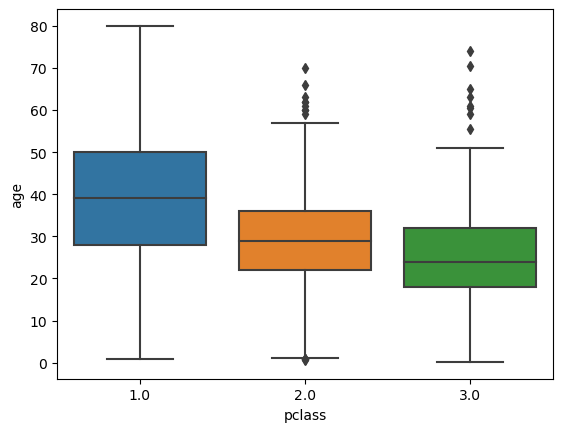

In [15]:
sns.boxplot(titanic['pclass'], titanic['age'])

### Analyzing Title

In [16]:
titanic['title']=0
titanic['title']=titanic.name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
titanic['title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col',
                         'Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
titanic['title']

0         Miss
1       Master
2         Miss
3           Mr
4          Mrs
         ...  
1305      Miss
1306        Mr
1307        Mr
1308        Mr
1309       NaN
Name: title, Length: 1310, dtype: object

In [17]:
pd.crosstab(titanic["title"], titanic["sex"]).T.style.background_gradient(cmap = "summer_r")

title,Dona,Master,Miss,Mr,Mrs,Other
sex,,,,,,
female,1,0,265,1,199,0
male,0,61,0,769,0,13


In [18]:
titanic.groupby("title")["age"].mean()

title
Dona      39.000000
Master     5.482704
Miss      21.834502
Mr        32.545531
Mrs       37.034884
Other     44.923077
Name: age, dtype: float64

C:\Users\LabUser\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


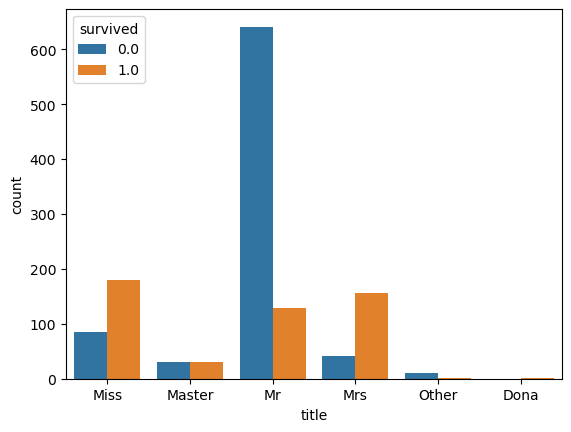

In [19]:
sns.countplot("title", hue = "survived", data = titanic)
plt.show()

In [20]:
pd.crosstab([titanic["title"], titanic["survived"]], titanic["pclass"], margins = True).style.background_gradient(cmap = "summer_r")

### Analyzing Fare

C:\Users\LabUser\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


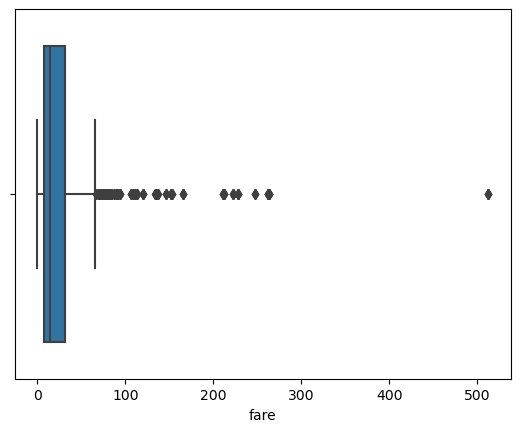

In [21]:
sns.boxplot(titanic["fare"])
plt.show()

C:\Users\LabUser\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LabUser\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LabUser\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


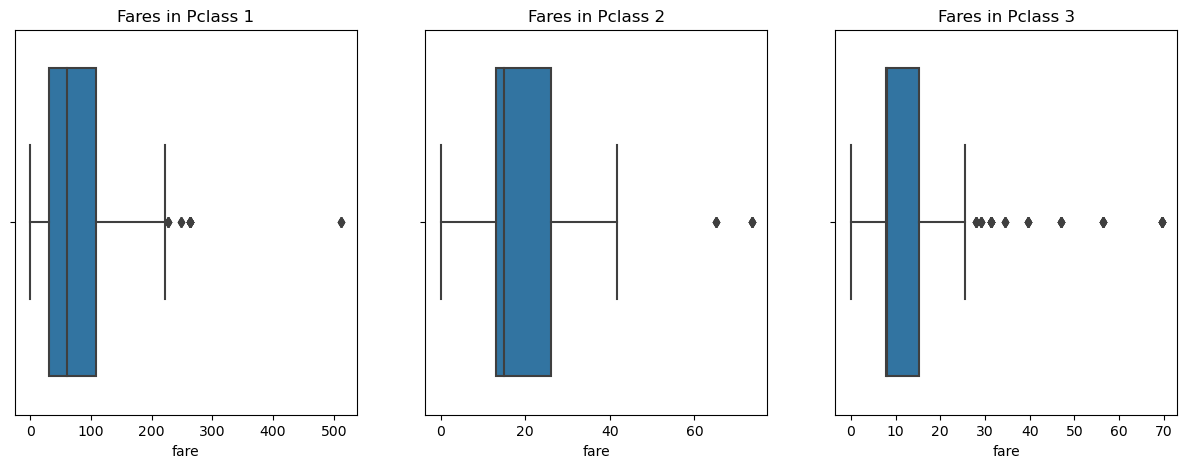

In [22]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
sns.boxplot(titanic[titanic["pclass"] == 1]["fare"], ax = ax[0])
ax[0].set_title("Fares in Pclass 1")
sns.boxplot(titanic[titanic["pclass"] == 2]["fare"], ax = ax[1])
ax[1].set_title("Fares in Pclass 2")
sns.boxplot(titanic[titanic["pclass"] == 3]["fare"], ax = ax[2])
ax[2].set_title("Fares in Pclass 3")
plt.show()

In [23]:
titanic.groupby("pclass")["fare"].mean()

pclass
1.0    87.508992
2.0    21.179196
3.0    13.302889
Name: fare, dtype: float64

In [24]:
titanic.groupby("pclass")["fare"].median()

pclass
1.0    60.0000
2.0    15.0458
3.0     8.0500
Name: fare, dtype: float64

### Inserting new dummy column for fare as fare_group

C:\Users\LabUser\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


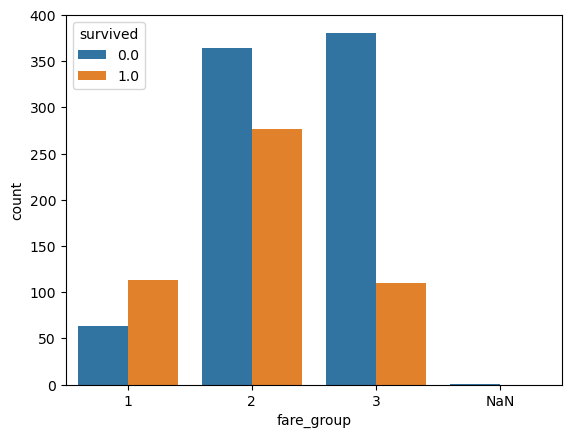

In [25]:
def fareG2int(data):
    data["fare_group"] = "NaN"
    data.loc[data["fare"] < 10, "fare_group"] = 3 
    data.loc[(data["fare"] >= 10) & (data["fare"] < 65), "fare_group"] = 2
    data.loc[data["fare"] >= 65, "fare_group"] = 1
    return data

titanic = fareG2int(titanic)

sns.countplot("fare_group", hue = "survived", data = titanic)
plt.show()

### Analyzing Embarked

In [26]:
titanic["embarked"] = titanic["embarked"].fillna("S")
pd.crosstab([titanic["embarked"], titanic["survived"]], titanic["sex"], margins = True).style.background_gradient(cmap = "summer_r")

C:\Users\LabUser\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


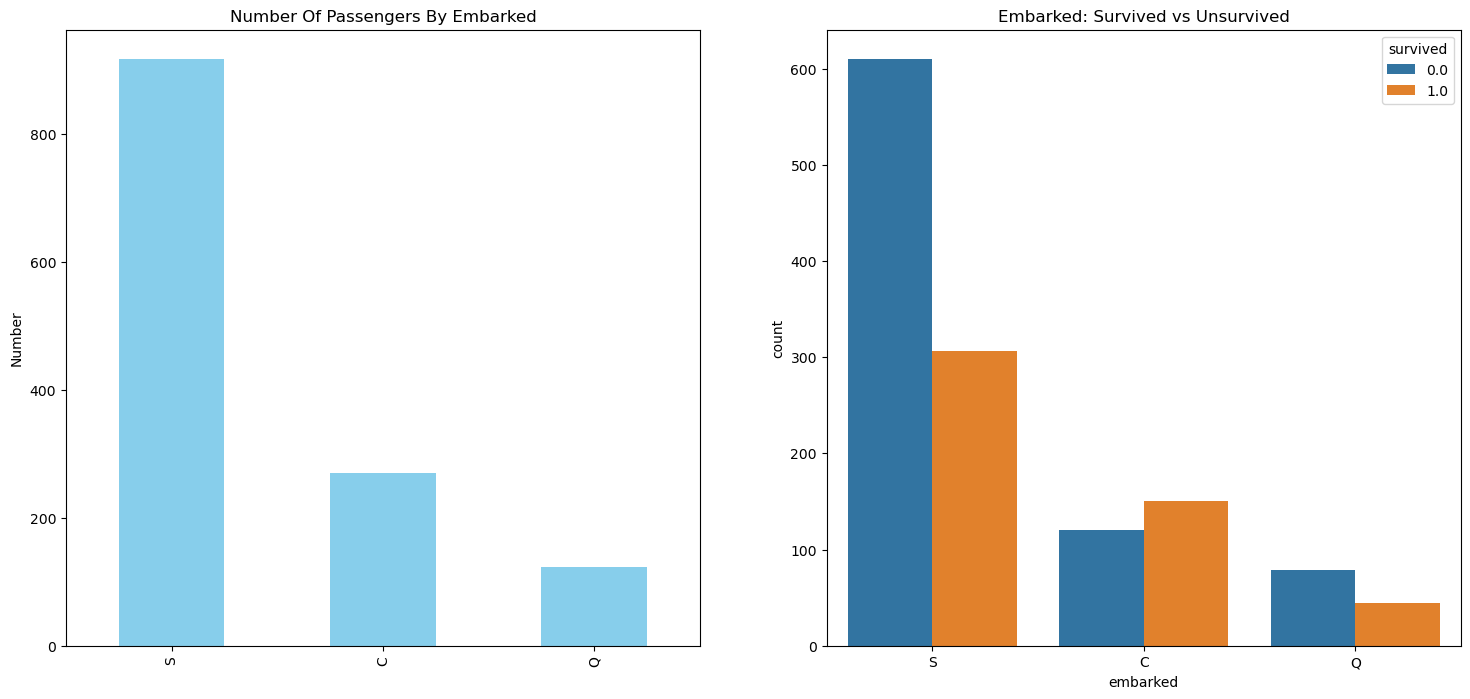

In [27]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
titanic["embarked"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of Passengers By Embarked")
ax[0].set_ylabel("Number")
sns.countplot("embarked", hue = "survived", data = titanic, ax = ax[1])
ax[1].set_title("Embarked: Survived vs Unsurvived")
plt.show()

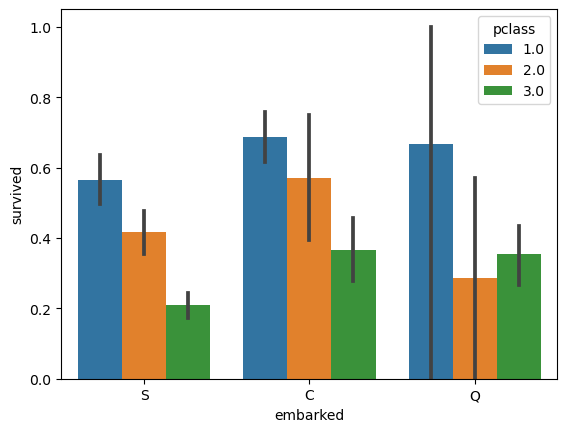

In [28]:
sns.barplot(x = "embarked", y = "survived", hue = "pclass", data = titanic)
plt.show()

### Replacing values of embarked to dummy variables

In [29]:
titanic["embarked"].replace(["S", "Q", "C"], [0, 1, 2], inplace = True)

### Analyzing SibSp

In [30]:
pd.crosstab([titanic["pclass"], titanic["survived"]], titanic["sibsp"], margins = True).style.background_gradient(cmap = "summer_r")

### Analyzing Parch

In [31]:
pd.crosstab([titanic["pclass"], titanic["survived"]], titanic["parch"], margins = True).style.background_gradient(cmap = "summer_r")

### Analyzing Cabin

C:\Users\LabUser\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


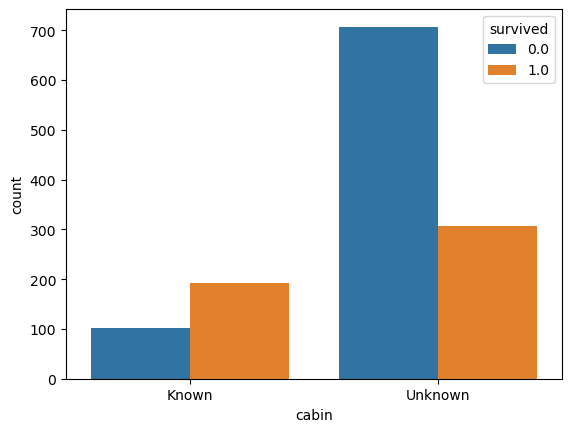

In [32]:
def Cabin_type(data):
    data.loc[data["cabin"].notnull(), "cabin"] = "Known"
    data.loc[data["cabin"].isnull(), "cabin"] = "Unknown"
    return data

titanic = Cabin_type(titanic)
sns.countplot("cabin", hue = "survived", data = titanic)
plt.show()

In [33]:
def cab2int(data):
    data.loc[data["cabin"] == "Known", 'cabin'] = 1
    data.loc[data["cabin"] == "Unknown", 'cabin'] = 0
    return data

titanic = cab2int(titanic)

In [34]:
titanic["sex"].replace(["male", "female"], [0, 1], inplace = True)

### Analyzing Age

In [35]:
titanic.groupby("title")["age"].mean()

title
Dona      39.000000
Master     5.482704
Miss      21.834502
Mr        32.545531
Mrs       37.034884
Other     44.923077
Name: age, dtype: float64

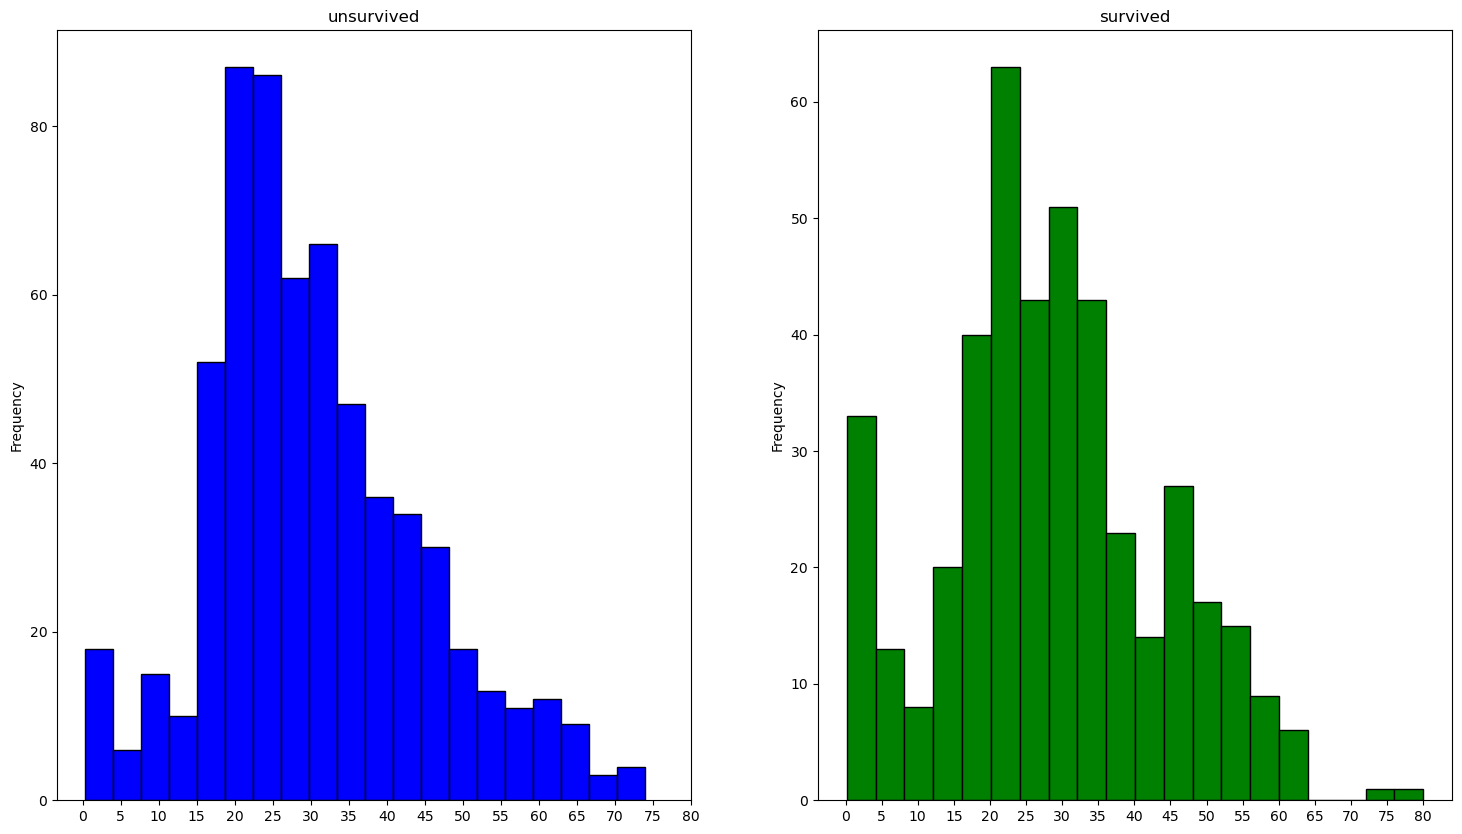

In [36]:
fig, ax = plt.subplots(1, 2, figsize = (18, 10))
titanic[titanic["survived"] == 0]["age"].plot.hist(ax = ax[0], bins = 20, edgecolor = "black", color = "blue")
ax[0].set_title("unsurvived")
domain_1 = list(range(0, 85, 5))
ax[0].set_xticks(domain_1)
titanic[titanic["survived"] == 1]["age"].plot.hist(ax = ax[1], bins = 20, edgecolor = "black", color = "green")
ax[1].set_title("survived")
domain_2 = list(range(0, 85, 5))
ax[1].set_xticks(domain_2)
plt.show()

### Inserting new dummy column for age as age_group

In [37]:
def ageG2int(data):
    data["age_group"] = ""
    data.loc[data["age"] <= 16, "age_group"] = 0 # Child
    data.loc[(data["age"] > 16) & (data["age"] <= 32), "age_group"] = 1 # young teen and teen adult
    data.loc[(data["age"] > 32) & (data["age"] <= 48), "age_group"] = 2 # middle age
    data.loc[(data["age"] > 48) & (data["age"] <= 64), "age_group"] = 3 # young elderly
    data.loc[data["age"] > 64, "age_group"] = 4 # elderly
    return data

titanic = ageG2int(titanic)

C:\Users\LabUser\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


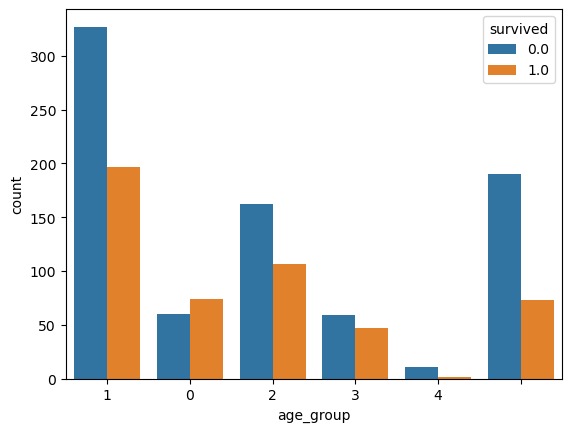

In [38]:
sns.countplot("age_group", hue = "survived", data = titanic)
plt.show()

In [39]:
pd.crosstab([titanic["age_group"], titanic["survived"]], titanic["pclass"], margins = True).style.background_gradient(cmap = "summer_r")

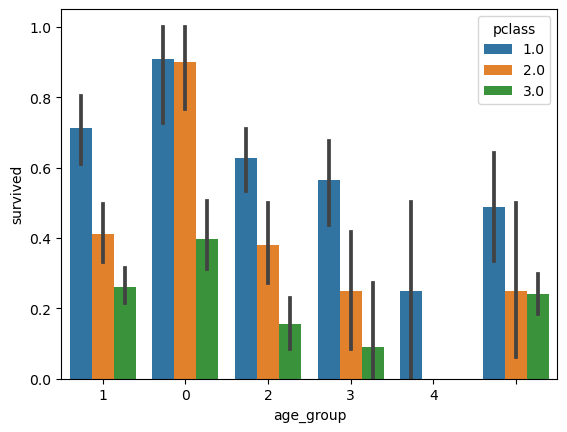

In [40]:
sns.barplot(x = "age_group", y = "survived", hue = "pclass", data = titanic)
plt.show()

In [41]:
pd.crosstab([titanic["age_group"], titanic["survived"]], [titanic["pclass"], titanic["sex"]], margins = True).style.background_gradient(cmap = "summer_r")

### Creating new column child wrt age

C:\Users\LabUser\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


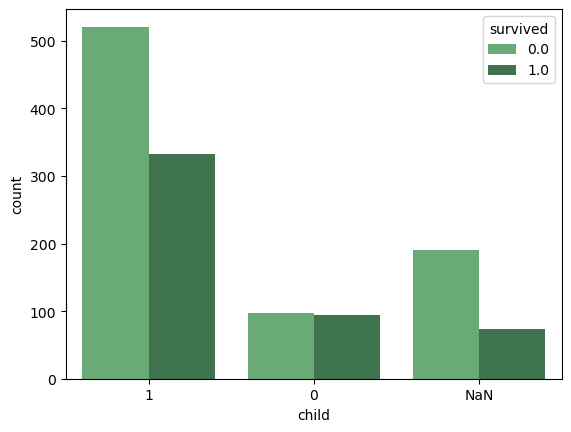

In [42]:
def child2int(data):
    data["child"] = "NaN"
    data.loc[data["age"] <= 18, "child"] = 0 # Child
    data.loc[data["age"] > 18, "child"] = 1 # Adult
    return data

titanic = child2int(titanic)

sns.countplot("child", hue = "survived", data = titanic, palette = "Greens_d")
plt.show()

### Creating new column famsize and fam group

In [43]:
titanic["famsize"] = titanic["sibsp"] + titanic["parch"] + 1

def famG2int(data):
    data["fam_group"] = "NaN"
    data.loc[data["famsize"] == 1, "fam_group"] = 0 # Single
    data.loc[data["famsize"] > 1, "fam_group"] = 1 # Family
    return data

titanic = famG2int(titanic)

C:\Users\LabUser\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


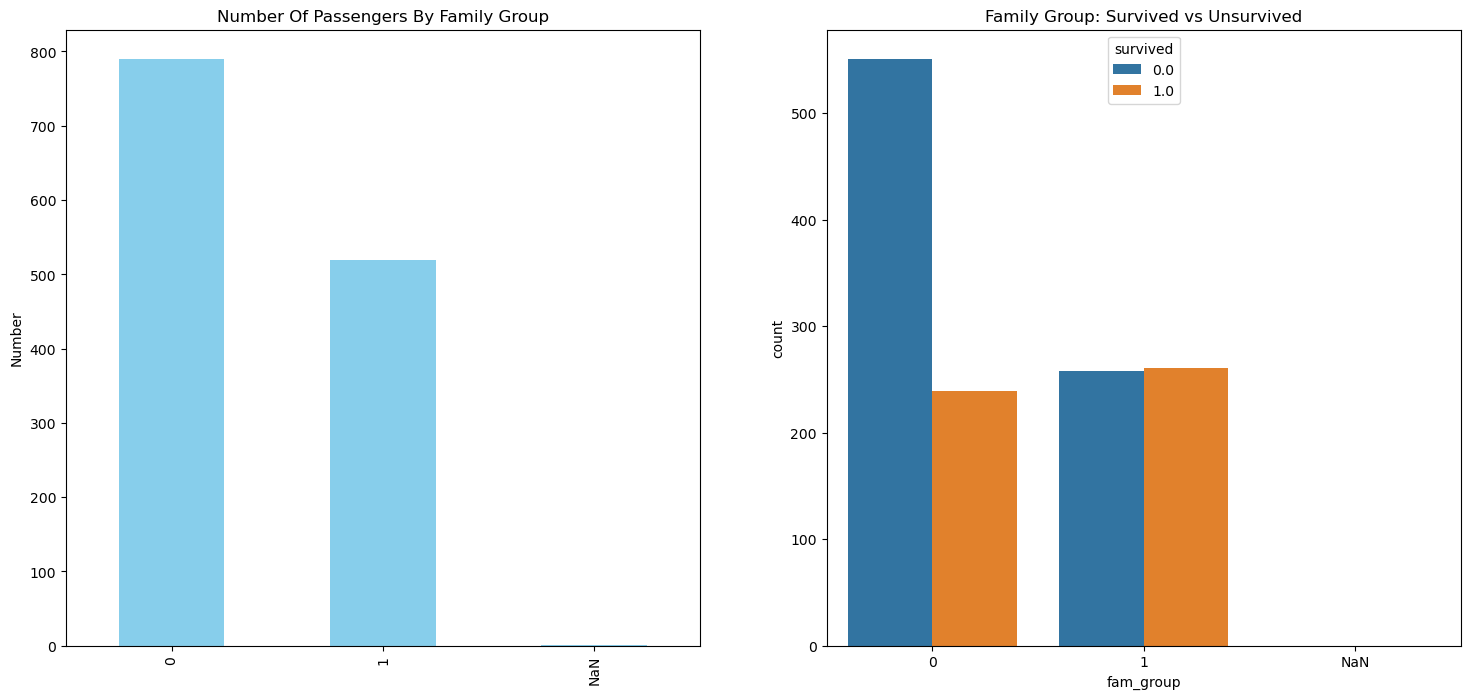

In [44]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
titanic["fam_group"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of Passengers By Family Group")
ax[0].set_ylabel("Number")
sns.countplot("fam_group", hue = "survived", data = titanic, ax = ax[1])
ax[1].set_title("Family Group: Survived vs Unsurvived")
plt.show()

In [45]:
pd.crosstab([titanic["fam_group"], titanic["survived"]], titanic["pclass"], margins = True).style.background_gradient(cmap = "summer_r")

### New column passenger id

In [46]:
titanic["passengerID"] = np.arange(len(titanic))

### Creating & descibe new dataframe titanic_data to reorder columns

In [47]:
titanic_data = titanic[:]
columns_titles = ["passengerID", "survived", "age_group", "fare_group", "pclass", "sex", "child", "fam_group", "cabin", "embarked"]
titanic_data = titanic_data[columns_titles].dropna()
titanic_data = titanic_data.fillna(titanic_data.mean())
titanic_data = titanic_data.apply (pd.to_numeric, errors='coerce')
titanic_data = titanic_data.dropna()
titanic_data = titanic_data.reset_index(drop=True)
titanic_data.describe()

C:\Users\LabUser\AppData\Local\Temp\ipykernel_12392\1150681466.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  titanic_data = titanic_data.fillna(titanic_data.mean())


,passengerID,survived,age_group,fare_group,pclass,sex,child,fam_group,cabin,embarked
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
mean,598.617225,0.408612,1.367464,2.172249,2.206699,0.371292,0.815311,0.436364,0.260287,0.453589
std,364.317186,0.491813,0.874771,0.667381,0.841542,0.483382,0.388231,0.496171,0.439001,0.808835
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,298.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,574.000000,0.000000,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,873.000000,1.000000,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1308.000000,1.000000,4.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000


### Plotting all features vs count with survived as label

C:\Users\LabUser\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LabUser\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LabUser\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LabUser\anaconda

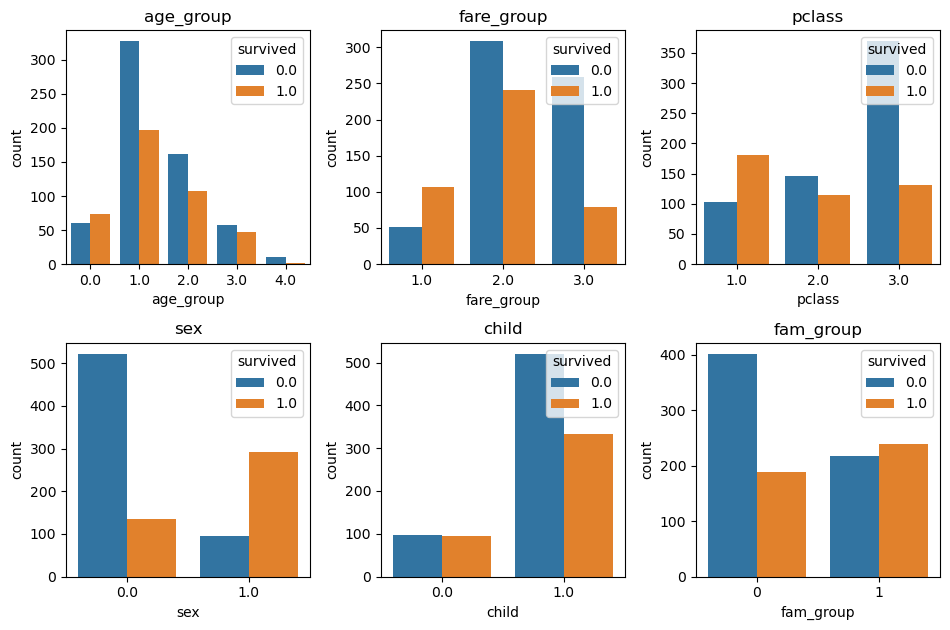

In [48]:
cols = ["age_group", "fare_group", "pclass", "sex", "child", "fam_group", "cabin", "embarked"]
n_rows = 2
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols * 3.2, n_rows * 3.2))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c
        ax = axs[r][c]
        sns.countplot(titanic_data[cols[i]], hue=titanic_data['survived'], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='survived', loc = 'upper right')
        
plt.tight_layout()

### Heatmap to show correlations

<AxesSubplot:title={'center':'Correlation of Features'}>

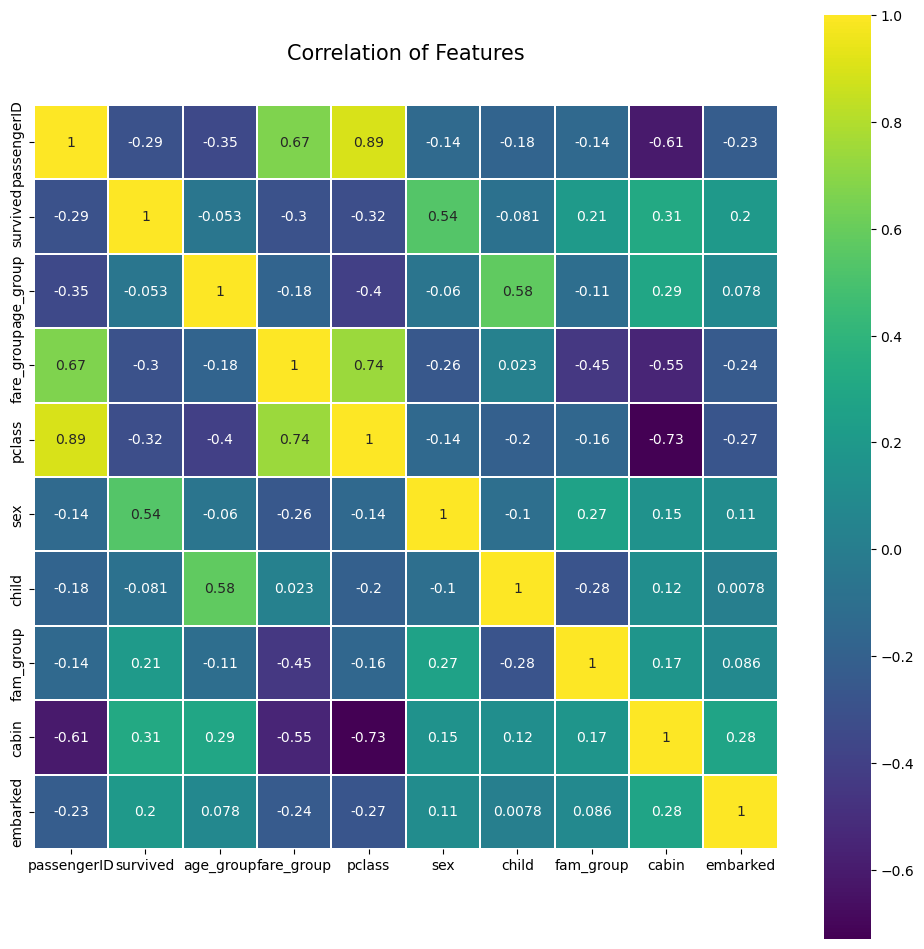

In [49]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(titanic_data.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

### Creating training and testing dataset in the ratio 80:20

In [50]:
X = titanic_data.iloc[:, 2:10].values
Y = titanic_data.iloc[:, 1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

### Scaling the datasets for model to learn better from new dataset

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Performing LinearRegression model

In [52]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

### Coefficients and intercepts

In [53]:
pd.DataFrame(model.coef_, titanic_data[cols].columns, columns = ['Coeff'])
print("Intercept: ",model.intercept_)

Intercept:  0.41387559808612445


### Predicting linear model

(array([ 1.,  1., 23., 11., 81., 28., 26., 18.,  5., 15.]),
 array([-1.09184368, -0.88913102, -0.68641836, -0.4837057 , -0.28099304,
        -0.07828038,  0.12443227,  0.32714493,  0.52985759,  0.73257025,
         0.93528291]),
 <BarContainer object of 10 artists>)

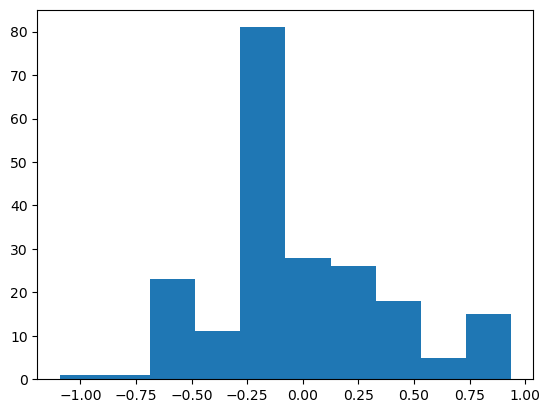

In [54]:
predictions = model.predict(X_test)
plt.hist(Y_test - predictions)

### Creating a function to create Logstic, KNN, SVC (linear & rbf), GaussianNB, DecisionTree & RandomForest models for training

In [55]:
def models(X_train, Y_train):
    
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
    
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
    knn.fit(X_train, Y_train)
    
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state=0)
    svc_lin.fit(X_train, Y_train)
    
    svc_rbf = SVC(kernel = 'rbf', random_state=0)
    svc_rbf.fit(X_train, Y_train)
    
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)
    
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, Y_train)
    
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)
    
    print('[0]Logistic Regression Training Accuracy: ', log.score(X_train, Y_train))
    print('[1]K Neighbors Training Accuracy: ', knn.score(X_train, Y_train))
    print('[2]SVC Linear Training Accuracy: ', svc_lin.score(X_train, Y_train))
    print('[3]SVC rbf Training Accuracy: ', svc_rbf.score(X_train, Y_train))
    print('[4]Gaussian NB Training Accuracy: ', gauss.score(X_train, Y_train))
    print('[5]Decision Tree Training Accuracy: ', tree.score(X_train, Y_train))
    print('[6]Random Forest Training Accuracy: ', forest.score(X_train, Y_train))
    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest

### Performing those models as mentioned

In [56]:
model = models(X_train, Y_train)

[0]Logistic Regression Training Accuracy:  0.7751196172248804
[1]K Neighbors Training Accuracy:  0.8205741626794258
[2]SVC Linear Training Accuracy:  0.777511961722488
[3]SVC rbf Training Accuracy:  0.8253588516746412
[4]Gaussian NB Training Accuracy:  0.7643540669856459
[5]Decision Tree Training Accuracy:  0.854066985645933
[6]Random Forest Training Accuracy:  0.8528708133971292


C:\Users\LabUser\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Testing & Printing confusion matrix

In [57]:
from sklearn.metrics import confusion_matrix

for i in range( len(model)):
    cm = confusion_matrix(Y_test, model[i].predict(X_test))
    
    TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
    test_score = (TP + TN) / (TP + TN + FN + FP)
    print(cm)
    print('Model[{}] Testing Accuracy = "{}"'.format(i, test_score))
    print()

[[106  22]
 [ 21  60]]
Model[0] Testing Accuracy = "0.7942583732057417"

[[117  11]
 [ 31  50]]
Model[1] Testing Accuracy = "0.7990430622009569"

[[109  19]
 [ 26  55]]
Model[2] Testing Accuracy = "0.784688995215311"

[[122   6]
 [ 32  49]]
Model[3] Testing Accuracy = "0.8181818181818182"

[[99 29]
 [24 57]]
Model[4] Testing Accuracy = "0.7464114832535885"

[[116  12]
 [ 33  48]]
Model[5] Testing Accuracy = "0.784688995215311"

[[116  12]
 [ 33  48]]
Model[6] Testing Accuracy = "0.784688995215311"



C:\Users\LabUser\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LabUser\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

### Revaluating RandomForest

In [58]:
forest = model[6]
importances = pd.DataFrame({'feature': titanic_data.iloc[:, 2:10].columns, 'importance': np.round(forest.feature_importances_, 3)} )
importances = importances.sort_values('importance', ascending = False).set_index('feature')
importances

,importance
feature,
sex,0.362
pclass,0.151
age_group,0.143
embarked,0.095
fare_group,0.086
cabin,0.072
fam_group,0.059
child,0.032


In [59]:
### Printing importances plot for each feature

<AxesSubplot:xlabel='feature'>

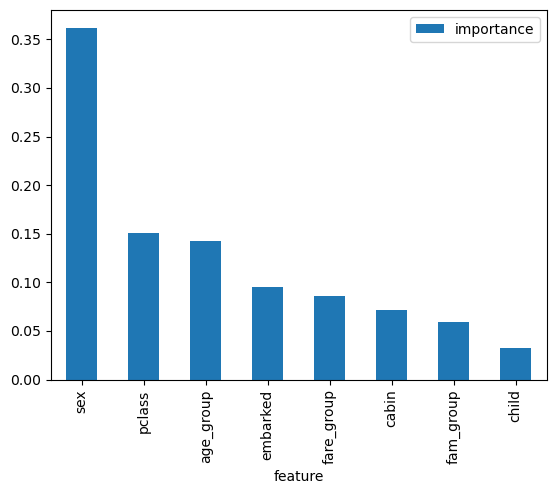

In [60]:
importances.plot.bar()

In [61]:
pred = model[6].predict(X_test)
print(pred)

print()

print(Y_test)

[1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0.]

[1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 

### Creating neural network using tensorflow keras

In [58]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, activation=tf.nn.relu, input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dropout(0.20),
    tf.keras.layers.Dense(20, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.20),
    tf.keras.layers.Dense(40, activation=tf.nn.sigmoid),
    tf.keras.layers.Dropout(0.20),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

optimiser = tf.keras.optimizers.Adam(0.001)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimiser,
              metrics=['accuracy'])

model.summary()

print(X_train.shape)
print(X_train)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                180       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 40)                840       
                                                                 
 dropout_2 (Dropout)         (None, 40)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 8

### Learning reduction callback function

In [59]:
lr_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc', 
                                                    patience=2, 
                                                    verbose=1, 
                                                    factor=0.5, 
                                                    min_lr=0.00001)


### Training model

In [64]:
BATCH_SIZE = 50
EPOCHS = 30
history = model.fit(X_train,
                    Y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
                    validation_data=(X_test,Y_test),
                    callbacks=[lr_reduction])

Epoch 1/30
16/16 [==============================] - 0s 7ms/step - loss: 0.4672 - accuracy: 0.7862 - val_loss: 0.4246 - val_accuracy: 0.8086 - lr: 0.0010
Epoch 2/30
16/16 [==============================] - 0s 4ms/step - loss: 0.4603 - accuracy: 0.8053 - val_loss: 0.4235 - val_accuracy: 0.8182 - lr: 0.0010
Epoch 3/30
16/16 [==============================] - 0s 4ms/step - loss: 0.4629 - accuracy: 0.7901 - val_loss: 0.4253 - val_accuracy: 0.8086 - lr: 0.0010
Epoch 4/30
16/16 [==============================] - 0s 4ms/step - loss: 0.4469 - accuracy: 0.7939 - val_loss: 0.4250 - val_accuracy: 0.8086 - lr: 0.0010
Epoch 5/30
16/16 [==============================] - 0s 4ms/step - loss: 0.4693 - accuracy: 0.7850 - val_loss: 0.4232 - val_accuracy: 0.8134 - lr: 0.0010
Epoch 6/30
16/16 [==============================] - 0s 4ms/step - loss: 0.4734 - accuracy: 0.8079 - val_loss: 0.4223 - val_accuracy: 0.8134 - lr: 0.0010
Epoch 7/30
16/16 [==============================] - 0s 3ms/step - loss: 0.4400 - a

16/16 [==============================] - 0s 3ms/step - loss: 0.4782 - accuracy: 0.7786 - val_loss: 0.4219 - val_accuracy: 0.8230 - lr: 0.0010
Epoch 22/30
16/16 [==============================] - 0s 4ms/step - loss: 0.4355 - accuracy: 0.8117 - val_loss: 0.4186 - val_accuracy: 0.8325 - lr: 0.0010
Epoch 23/30
16/16 [==============================] - 0s 4ms/step - loss: 0.4507 - accuracy: 0.8066 - val_loss: 0.4182 - val_accuracy: 0.8325 - lr: 0.0010
Epoch 24/30
16/16 [==============================] - 0s 4ms/step - loss: 0.4368 - accuracy: 0.8181 - val_loss: 0.4178 - val_accuracy: 0.8325 - lr: 0.0010
Epoch 25/30
16/16 [==============================] - 0s 4ms/step - loss: 0.4455 - accuracy: 0.8053 - val_loss: 0.4184 - val_accuracy: 0.8325 - lr: 0.0010
Epoch 26/30
16/16 [==============================] - 0s 4ms/step - loss: 0.4791 - accuracy: 0.7837 - val_loss: 0.4198 - val_accuracy: 0.8325 - lr: 0.0010
Epoch 27/30
16/16 [==============================] - 0s 4ms/step - loss: 0.4611 - accura

### Evaluating model against test data

In [65]:
results = model.evaluate(X_test, Y_test, batch_size=128)
print("test loss, test acc:", results)

2/2 [==============================] - 0s 3ms/step - loss: 0.4168 - accuracy: 0.8325
test loss, test acc: [0.4167546033859253, 0.8325358629226685]


### Predicting survival for Jack and Rose

In [80]:
#["age_group", "fare_group", "pclass", "sex", "child", "fam_group", "cabin", "embarked"]
jack = [[1, 3, 3, 0, 1, 0, 0, 0]]
rose = [[1, 1, 1, 1, 1, 1, 1, 0]]
pred = model.predict([jack, rose])
print("Jack Surviving Rate:", pred[0][1])
print("Rose Surviving Rate:", pred[1][1])

Jack Surviving Rate: 0.1184165
Rose Surviving Rate: 0.9338851
